# Classification - Decision Tree - Education_Attainment

Now we try a Decision Tree Classifier from sklearn on the same Internat Usage Education Attainment data. The same interface is used as the k-nearest-networks classifier.

Again, we separate the data into training and test data.

In [1]:
# Import feature subset with Education_Attainment Column and one hot encoded values

from sklearn import neighbors, datasets
import pandas as pd
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap
import itertools
import re, string
import sys
sys.path.append('../resources')
from w6support import plot_2d_class
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

originalDF = pd.read_csv('educationFeatureSubset.csv')

# Next we check the Education_Attainment options in the dataset for use with classification
print(originalDF.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
originalDF.replace(education_values, inplace=True)


featureDF = originalDF[originalDF.columns.difference(['Education_Attainment'])]

predNames = list(originalDF.columns[originalDF.columns != 'Education_Attainment'])

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


In [2]:
from sklearn.model_selection import train_test_split

X, y = featureDF, originalDF['Education_Attainment']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y)

from sklearn.tree import DecisionTreeClassifier

# Derive Xtrain2, which is the 
XtrainDf = pd.DataFrame(data=Xtrain, columns=predNames)
c1 = 'Age'
c2 = 'Race'
colNames = [c1, c2]
Xtrain2 = XtrainDf[colNames]
nTrain = Xtrain2.shape[0]

XtestDf = pd.DataFrame(data=Xtest, columns=predNames)
Xtest2 = XtestDf[colNames]
Xcombined2 = pd.concat([Xtrain2, Xtest2])
ycombined = np.hstack((ytrain, ytest))


We also look at comparing different decision trees to the `Age` $\times$ `Race` data, based on the following conditions

1. maximum tree depth (2,3,4,5)
2. choice of tree impurity algorithm (`gini` or `entropy`)

which is 8 combinations in all.

Plotting pic/depth_2_gini_decisionTree_Education_Age_Race.pdf
0.3664688427299703
[[  0 220  61   0   0   0   0   0   0]
 [  0 529 126   3   0   0   0   0   0]
 [  0 375 189   0   0   0   0   0   0]
 [  0 176  50  23   0   0   0   0   0]
 [  0  48   6   0   0   0   0   0   0]
 [  0   6   0  34   0   0   0   0   0]
 [  0  67  24   1   0   0   0   0   0]
 [  0  48   3   0   0   0   0   0   0]
 [  0  23   5   5   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.355     0.804     0.492       658
           3      0.407     0.335     0.368       564
           4      0.348     0.092     0.146       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.366  

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.34915924826904055
[[  0   1 280   0   0   0   0   0   0]
 [  0 134 521   3   0   0   0   0   0]
 [  0  15 549   0   0   0   0   0   0]
 [  0  52 174  23   0   0   0   0   0]
 [  0   1  53   0   0   0   0   0   0]
 [  0   0   6  34   0   0   0   0   0]
 [  0   2  89   1   0   0   0   0   0]
 [  0   0  51   0   0   0   0   0   0]
 [  0   1  27   5   0   0   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.650     0.204     0.310       658
           3      0.314     0.973     0.475       564
           4      0.348     0.092     0.146       249
           5      0.000     0.000     0.000        54
           6      0.000     0.000     0.000        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.349     0.349     0.349      2022
   macro avg      0.146     0.14

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.36894164193867457
[[  0 103 178   0   0   0   0   0   0]
 [  0 351 304   2   0   1   0   0   0]
 [  0 205 359   0   0   0   0   0   0]
 [  0 131  95   9   0  14   0   0   0]
 [  0  24  30   0   0   0   0   0   0]
 [  0   4   2   7   0  27   0   0   0]
 [  0  35  56   0   0   1   0   0   0]
 [  0  32  19   0   0   0   0   0   0]
 [  0  14  14   0   0   5   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.390     0.533     0.451       658
           3      0.340     0.637     0.443       564
           4      0.500     0.036     0.067       249
           5      0.000     0.000     0.000        54
           6      0.562     0.675     0.614        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.369     0.369     0.369      2022
   macro avg      0.199     0.20

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3758654797230465
[[  0 178 103   0   0   0   0   0   0]
 [  0 497 158   2   0   1   0   0   0]
 [  0 337 227   0   0   0   0   0   0]
 [  0 175  51   9   0  14   0   0   0]
 [  0  43  11   0   0   0   0   0   0]
 [  0   5   1   7   0  27   0   0   0]
 [  0  62  29   0   0   1   0   0   0]
 [  0  44   7   0   0   0   0   0   0]
 [  0  20   8   0   0   5   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.365     0.755     0.492       658
           3      0.382     0.402     0.392       564
           4      0.500     0.036     0.067       249
           5      0.000     0.000     0.000        54
           6      0.562     0.675     0.614        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.376     0.376     0.376      2022
   macro avg      0.201     0.208

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3714144411473788
[[  9 102 170   0   0   0   0   0   0]
 [  3 350 301   3   0   1   0   0   0]
 [  5 203 355   1   0   0   0   0   0]
 [  0 128  96  14   0  11   0   0   0]
 [  1  24  29   0   0   0   0   0   0]
 [  0   4   2  11   0  23   0   0   0]
 [  0  35  56   0   0   1   0   0   0]
 [  0  32  19   0   0   0   0   0   0]
 [  0  14  14   1   0   4   0   0   0]]
              precision    recall  f1-score   support

           1      0.500     0.032     0.060       281
           2      0.392     0.532     0.452       658
           3      0.341     0.629     0.442       564
           4      0.467     0.056     0.100       249
           5      0.000     0.000     0.000        54
           6      0.575     0.575     0.575        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.371     0.371     0.371      2022
   macro avg      0.253     0.203

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37537091988130566
[[  0 178 103   0   0   0   0   0   0]
 [  0 497 158   2   0   1   0   0   0]
 [  0 337 227   0   0   0   0   0   0]
 [  0 175  51  12   0  11   0   0   0]
 [  0  43  11   0   0   0   0   0   0]
 [  0   5   1  11   0  23   0   0   0]
 [  0  62  29   0   0   1   0   0   0]
 [  0  44   7   0   0   0   0   0   0]
 [  0  20   8   1   0   4   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.365     0.755     0.492       658
           3      0.382     0.402     0.392       564
           4      0.462     0.048     0.087       249
           5      0.000     0.000     0.000        54
           6      0.575     0.575     0.575        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.375     0.375     0.375      2022
   macro avg      0.198     0.19

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.367457962413452
[[  3 100 178   0   0   0   0   0   0]
 [  1 338 316   2   0   1   0   0   0]
 [  2 196 366   0   0   0   0   0   0]
 [  0 126  99  11   0  13   0   0   0]
 [  0  22  32   0   0   0   0   0   0]
 [  0   3   3   9   0  25   0   0   0]
 [  0  34  57   0   0   1   0   0   0]
 [  0  31  20   0   0   0   0   0   0]
 [  0  14  14   1   0   4   0   0   0]]
              precision    recall  f1-score   support

           1      0.500     0.011     0.021       281
           2      0.391     0.514     0.444       658
           3      0.337     0.649     0.444       564
           4      0.478     0.044     0.081       249
           5      0.000     0.000     0.000        54
           6      0.568     0.625     0.595        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.367     0.367     0.367      2022
   macro avg      0.253     0.205 

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.37734915924826906
[[  2 177 102   0   0   0   0   0   0]
 [  1 495 157   4   0   1   0   0   0]
 [  1 336 227   0   0   0   0   0   0]
 [  0 170  52  14   0  13   0   0   0]
 [  1  43  10   0   0   0   0   0   0]
 [  0   5   1   9   0  25   0   0   0]
 [  0  62  29   0   0   1   0   0   0]
 [  0  44   7   0   0   0   0   0   0]
 [  0  20   8   1   0   4   0   0   0]]
              precision    recall  f1-score   support

           1      0.400     0.007     0.014       281
           2      0.366     0.752     0.493       658
           3      0.383     0.402     0.392       564
           4      0.500     0.056     0.101       249
           5      0.000     0.000     0.000        54
           6      0.568     0.625     0.595        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.377     0.377     0.377      2022
   macro avg      0.246     0.20

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


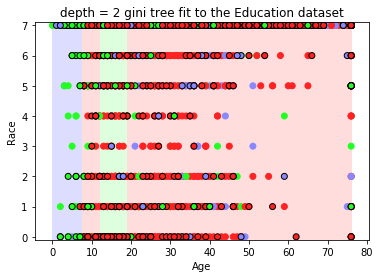

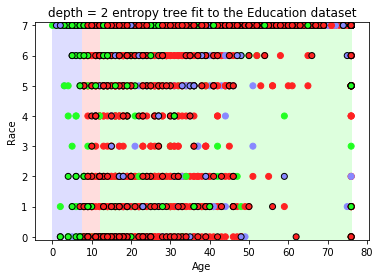

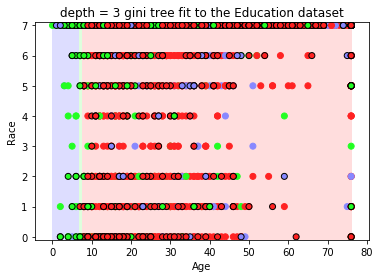

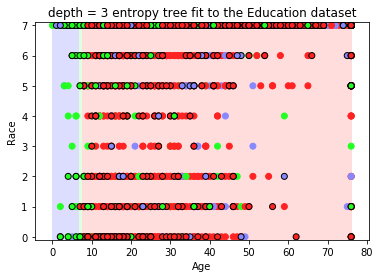

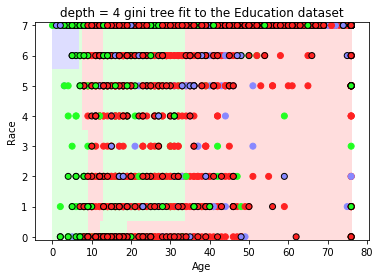

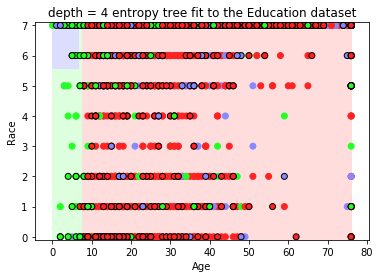

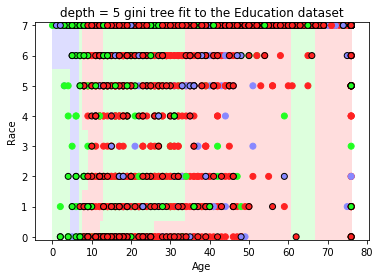

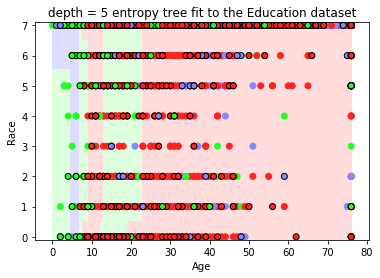

In [3]:
# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFDDDD', '#DDFFDD', '#DDDDFF'])
cmap_bold = ListedColormap(['#FF2222', '#22FF22', '#8888FF'])

pattern = re.compile('[\W_]+', re.UNICODE)

c1 = pattern.sub("",c1.title()) # Make titlecase, then remove non-alphanumeric characters
c2 = pattern.sub("",c2.title())

for treeDepth in range(2,6):
  for criterion in ["gini","entropy"]:
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
    tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)

    tree2.fit(Xtrain2, ytrain)

    plotTitle = "depth = %i %s %s fit to the %s dataset" % (treeDepth, criterion, "tree", "Education")
    fileTitle = "decisionTree/education/depth_%i_%s_%s_%s_%s_%s.pdf" % (treeDepth, criterion, "decisionTree", "Education", c1, c2)

    print("Plotting "+fileTitle)
    plot_2d_class(Xcombined2, ycombined, nTrain, tree2, plotTitle, fileTitle, cmap_light, cmap_bold)

    ytree2 = tree2.predict(Xtest2)
    print(accuracy_score(ytest, ytree2))
    print(confusion_matrix(ytest, ytree2))
    print(classification_report(ytest, ytree2, digits=3))

We include all features below

In [11]:
criterion = "entropy"
treeDepth = 5
tree = DecisionTreeClassifier(criterion=criterion, max_depth=treeDepth, random_state=0)
tree.fit(Xtrain, ytrain)
y_treeTest = tree.predict(Xtest)
print(accuracy_score(ytest, y_treeTest))
print(confusion_matrix(ytest, y_treeTest))
print(classification_report(ytest, y_treeTest, digits=3))

0.3971315529179031
[[  0  46 235   0   0   0   0   0   0]
 [  0 371 273  13   0   1   0   0   0]
 [  0 183 381   0   0   0   0   0   0]
 [  0 151  60  24   0  14   0   0   0]
 [  0  14  40   0   0   0   0   0   0]
 [  0   3   3   7   0  27   0   0   0]
 [  0  48  43   0   0   1   0   0   0]
 [  0  10  41   0   0   0   0   0   0]
 [  0  14  14   0   0   5   0   0   0]]
              precision    recall  f1-score   support

           1      0.000     0.000     0.000       281
           2      0.442     0.564     0.495       658
           3      0.350     0.676     0.461       564
           4      0.545     0.096     0.164       249
           5      0.000     0.000     0.000        54
           6      0.562     0.675     0.614        40
           7      0.000     0.000     0.000        92
           8      0.000     0.000     0.000        51
           9      0.000     0.000     0.000        33

   micro avg      0.397     0.397     0.397      2022
   macro avg      0.211     0.223

/Users/annadowling/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


One of the main advantages of decision trees is the fact that they provide easily interpreted models for prediction. Indeed, the rules encoded in the tree can help to understand how the predictors combine and contribute to explaining the classification. As such, decision trees are often described as _white box_, where other algorithms (in particular, neural networks) are best seen as _black box_.

To aid interpretation, `scikit-learn` can output the model in a graph description language such as [dot](https://www.graphviz.org/pdf/dotguide.pdf) using the `export_graphviz` method. If you wish, you can export the `dot` file and process it using tools, both command line such as [dotty](https://www.graphviz.org/pdf/dottyguide.pdf) and more general tools such as those listed [here](https://en.wikipedia.org/wiki/Graphviz). However, it is probably more convenient to use a `dot` postprocessor (`pydotplus`) directly from within the notebook to create an object that can be displayed in the notebook, or saved to a file as below.

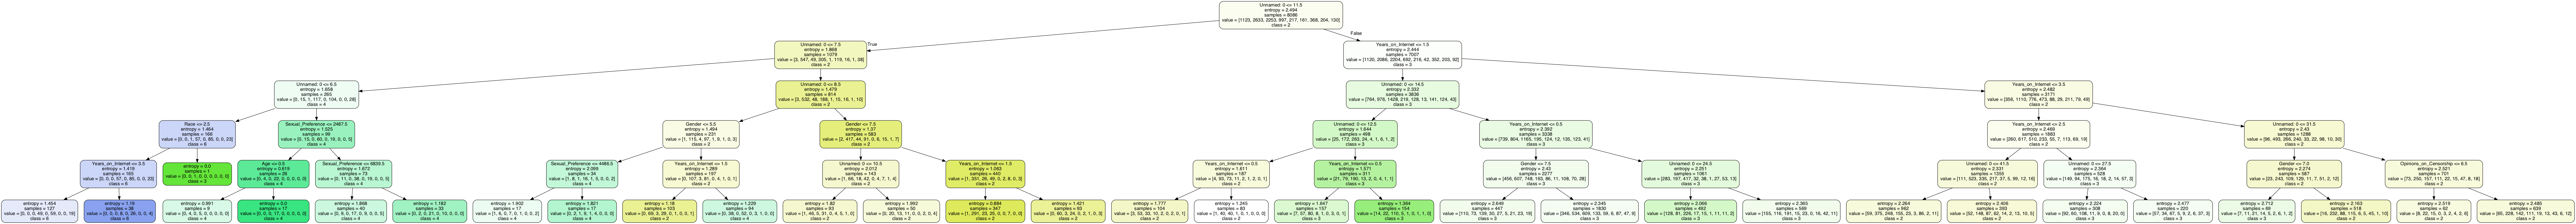

True

In [12]:
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn.tree import export_graphviz
        
dot_data = export_graphviz(
    tree, 
    out_file=None,
    feature_names=predNames,  
    # the parameters below are new in sklearn 0.18
    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
graph.write_pdf("decisionTree/education/education-tree.pdf")
